# Assignment 2 - Project 13 - Customer Clustering
## Simone Tarenzi, Saad Raza Hussain Shafi

## Importing the data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

customers = pd.read_csv('Customers.csv')

In [2]:
customers

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...,...
1995,1996,Female,71,184387,40,Artist,8,7
1996,1997,Female,91,73158,32,Doctor,7,7
1997,1998,Male,87,90961,14,Healthcare,9,2
1998,1999,Male,77,182109,4,Executive,7,2


In [3]:
customers.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


In [4]:
customers.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,2000.0,1000.5000,577.494589,1.0,500.75,1000.5,1500.25,2000.0
Age,2000.0,48.9600,28.429747,0.0,25.00,48.0,73.00,99.0
Annual Income ($),2000.0,110731.8215,45739.536688,0.0,74572.00,110045.0,149092.75,189974.0
Spending Score (1-100),2000.0,50.9625,27.934661,0.0,28.00,50.0,75.00,100.0
Work Experience,2000.0,4.1025,3.922204,0.0,1.00,3.0,7.00,17.0
Family Size,2000.0,3.7685,1.970749,1.0,2.00,4.0,5.00,9.0


# Data Description

https://www.kaggle.com/datasets/datascientistanna/customers-dataset

This dataset is a detailed analysis of a imaginative shop's ideal customers. It helps a business to better understand its customers. The owner of a shop gets information about Customers through membership cards.

The dataset has 2000 records and 8 features:

* Customer ID: goes from 1 to 2000
* Gender: male or female
* Age: expressed in years
* Annual Income: expressed in dollars
* Spending Score: score assigned by the shop, based on customer behavior and spending nature
* Profession
* Work Experience: expressed in years
* Family Size: number of people in the household family unit

## Gender

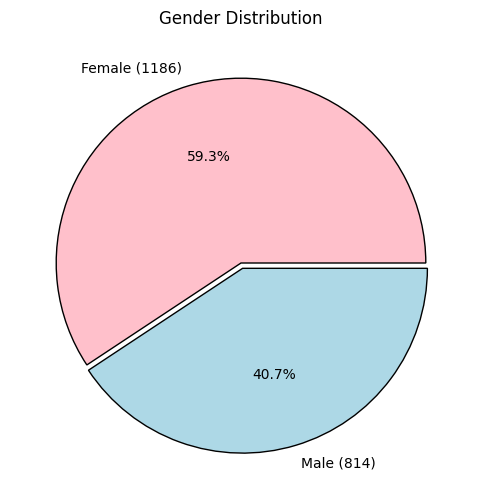

In [5]:
# pie chart of gender distribution
gender_counts = customers['Gender'].value_counts()

labels = [f'{label} ({count})' for label, count in gender_counts.items()]
explode = (0, 0.03)

plt.figure(figsize=(10,6))
plt.pie(gender_counts, explode=explode, labels=labels, autopct='%1.1f%%', colors=['pink', 'lightblue'], wedgeprops=dict(edgecolor='black'))
plt.title('Gender Distribution')
plt.show()

## Age

Min Age: 0 years
Max Age: 99 years
Standard Deviation: 28.43
Average Age: 48.96
Average Male Age: 49.16
Average Female Age: 48.82


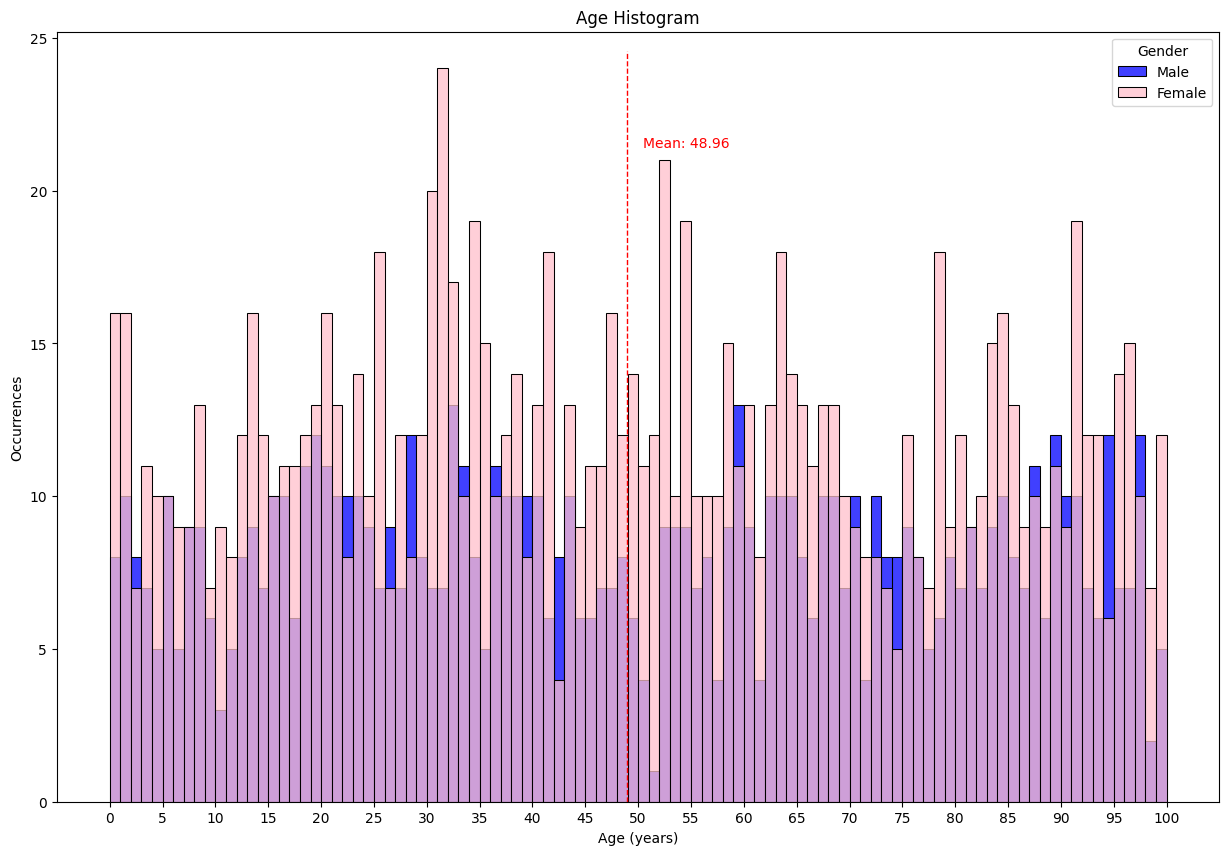

In [6]:
# get minimum and maximum age
min_age = customers['Age'].min()
max_age = customers['Age'].max()

print('Min Age: {:.0f} years'.format(min_age))
print('Max Age: {:.0f} years'.format(max_age))

# calculate average age
average_age = customers['Age'].mean()

# calculate standard deviation
std_age = customers['Age'].std()
print('Standard Deviation: {:.2f}'.format(std_age))

# separate age by gender
male_customers = customers[customers['Gender'] == 'Male']
female_customers = customers[customers['Gender'] == 'Female']

# calculate average age by gender
average_male_age = male_customers['Age'].mean()
average_female_age = female_customers['Age'].mean()

print('Average Age: {:.2f}'.format(average_age))
print('Average Male Age: {:.2f}'.format(average_male_age))
print('Average Female Age: {:.2f}'.format(average_female_age))

# histograms
plt.figure(figsize=(15,10))
sns.histplot(male_customers['Age'], bins=range(0, max_age + 2), color='blue', label='Male')
sns.histplot(female_customers['Age'], bins=range(0, max_age + 2), color='pink', label='Female')
plt.xticks(np.arange(min_age, max_age + 2, 5))

# add average lines
plt.axvline(average_age, color='red', linestyle='dashed', linewidth=1, ymax=0.975)
# plt.axvline(average_male_age, color='blue', linestyle='dashed', linewidth=1, ymax=0.975)
# plt.axvline(average_female_age, color='pink', linestyle='dashed', linewidth=1, ymax=0.975)

# add text near the lines
plt.text(average_age * 1.03, plt.ylim()[1] * 0.85, 'Mean: {:.2f}'.format(average_age), color='red')
# plt.text(average_male_age * 1.03, plt.ylim()[1] * 0.85, 'Mean: {:.2f}'.format(average_male_age), color='blue')
# plt.text(average_female_age * 1.03, plt.ylim()[1] * 0.85, 'Mean: {:.2f}'.format(average_female_age), color='pink')

plt.title('Age Histogram')
plt.xlabel('Age (years)')
plt.ylabel('Occurrences')
plt.legend(title='Gender')
plt.show()

## Annual Income

Min Annual Income: $0
Max Annual Income: $189974
Standard Deviation: $45739.54


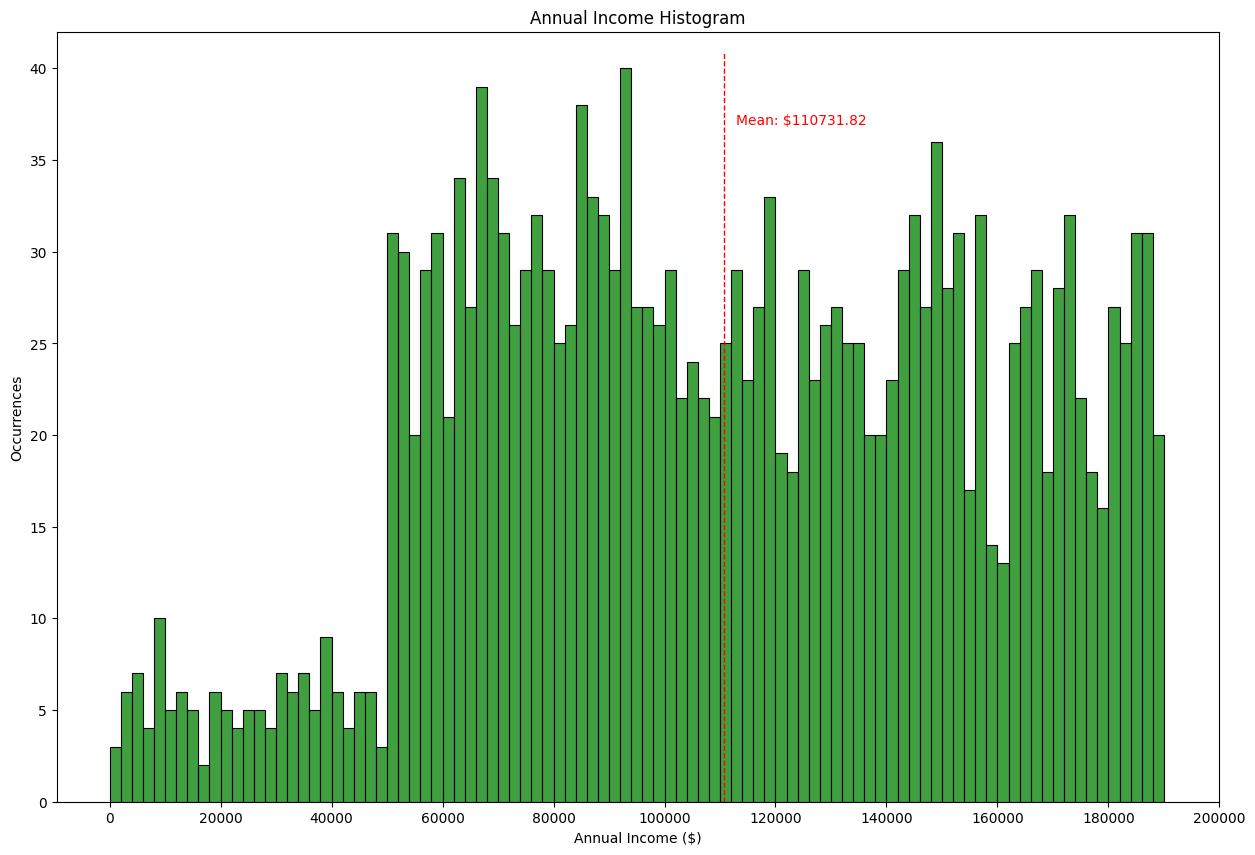

In [7]:
# get minimum and maximum annual income
min_income = customers['Annual Income ($)'].min()
max_income = customers['Annual Income ($)'].max()

print('Min Annual Income: ${:.0f}'.format(min_income))
print('Max Annual Income: ${:.0f}'.format(max_income))

# calculate average annual income
average_income = customers['Annual Income ($)'].mean()

# calculate standard deviation
std_income = customers['Annual Income ($)'].std()
print('Standard Deviation: ${:.2f}'.format(std_income))

# histogram
plt.figure(figsize=(15,10))
sns.histplot(customers['Annual Income ($)'], bins=range(0, max_income + 2000, 2000), color='green')
plt.xticks(np.arange(min_income, max_income + 20000, 20000))
plt.axvline(average_income, color='red', linestyle='dashed', linewidth=1, ymax=0.975)

# add text near the lines
plt.text(average_income * 1.02, plt.ylim()[1] * 0.88, 'Mean: ${:.2f}'.format(average_income), color='red')

plt.title('Annual Income Histogram')
plt.xlabel('Annual Income ($)')
plt.ylabel('Occurrences')
plt.show()

## Spending Score

Min Spending Score: 0
Max Spending Score: 100
Standard Deviation: 27.93


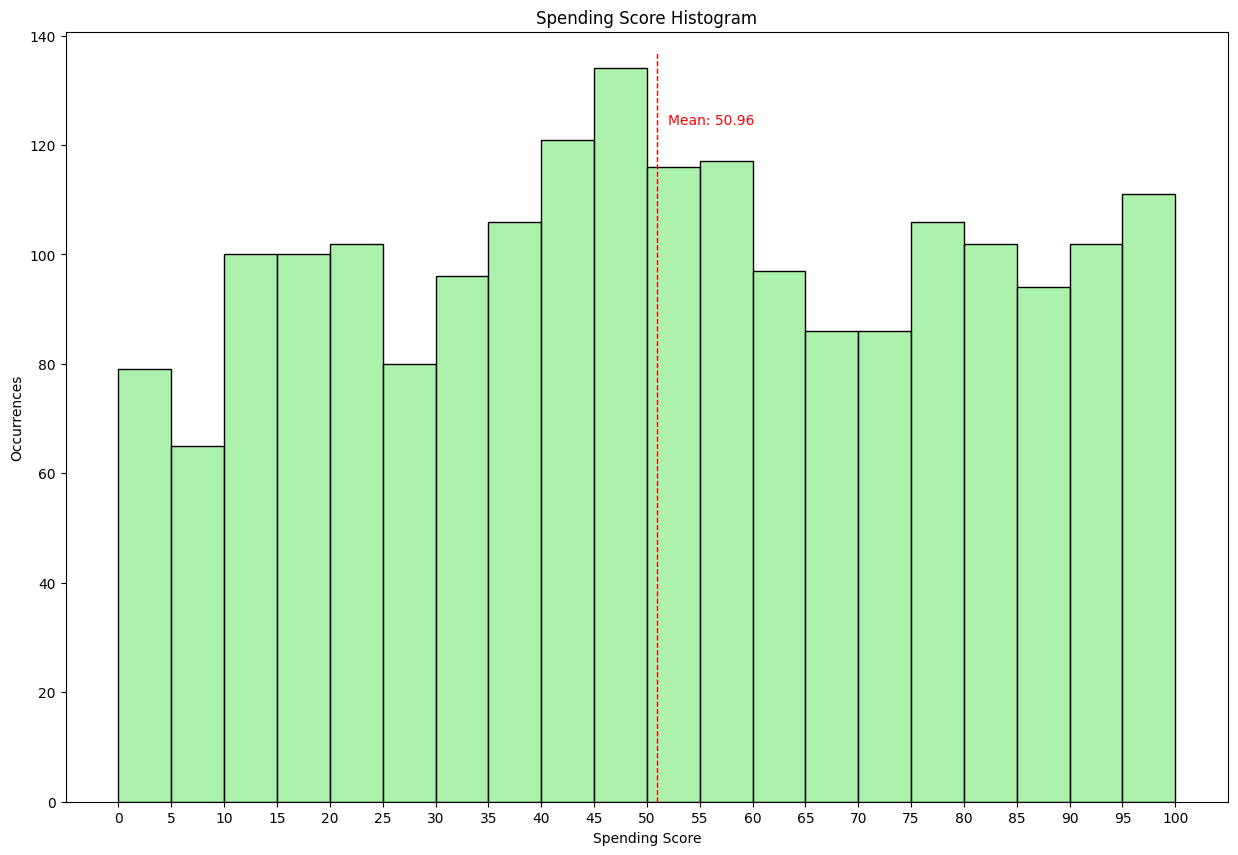

In [8]:
# get minimum and maximum spending score
min_score = customers['Spending Score (1-100)'].min()
max_score = customers['Spending Score (1-100)'].max()

print('Min Spending Score: {:.0f}'.format(min_score))
print('Max Spending Score: {:.0f}'.format(max_score))

# calculate average spending score
average_score = customers['Spending Score (1-100)'].mean()

# calculate standard deviation
std_score = customers['Spending Score (1-100)'].std()
print('Standard Deviation: {:.2f}'.format(std_score))

# histogram
plt.figure(figsize=(15,10))
sns.histplot(customers['Spending Score (1-100)'], bins=range(0, max_score + 5, 5), color='lightgreen')
plt.xticks(np.arange(min_score, max_score + 5, 5))
plt.axvline(average_score, color='red', linestyle='dashed', linewidth=1, ymax=0.975)
plt.text(average_score * 1.02, plt.ylim()[1] * 0.88, 'Mean: {:.2f}'.format(average_score), color='red')

plt.title('Spending Score Histogram')
plt.xlabel('Spending Score')
plt.ylabel('Occurrences')
plt.show()

## Profession

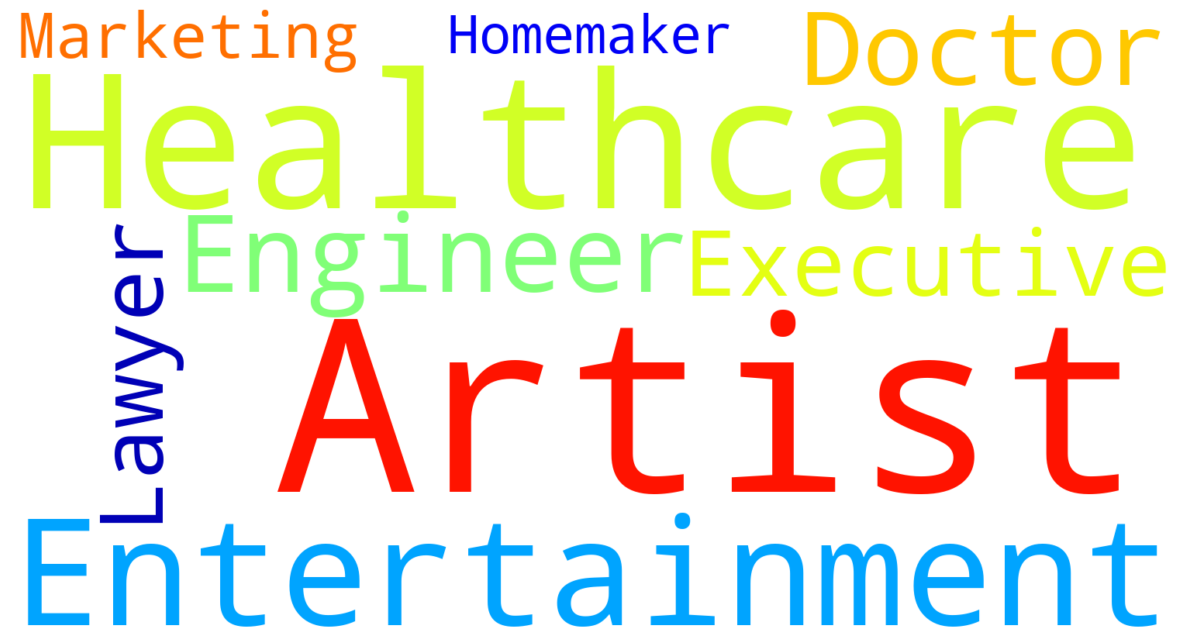

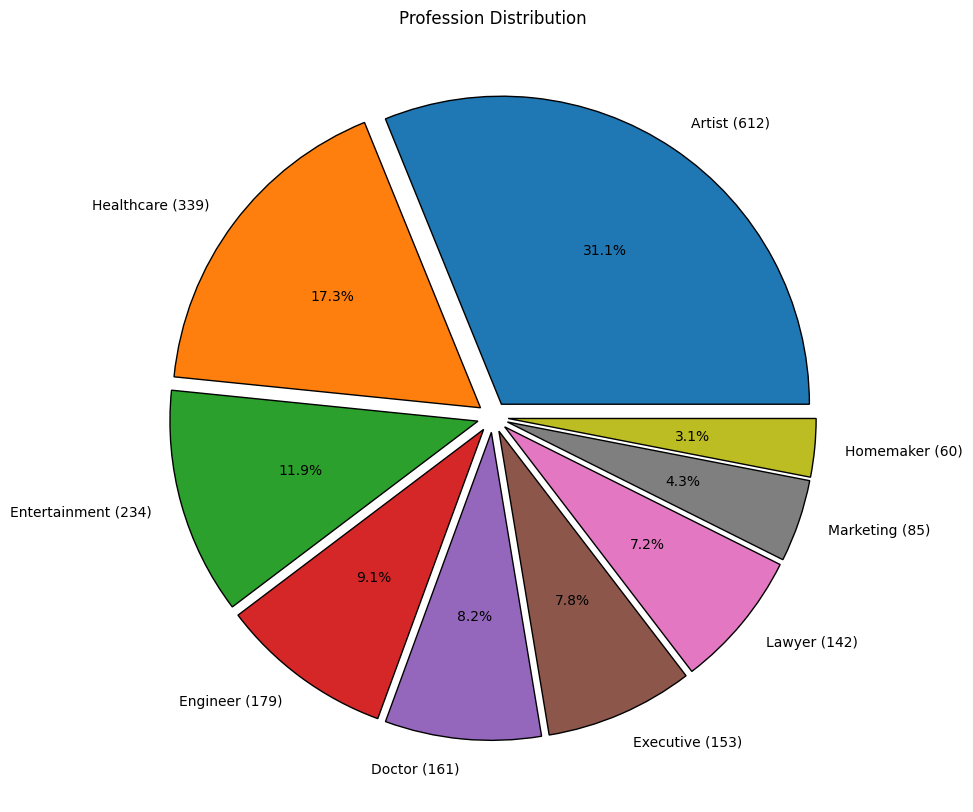

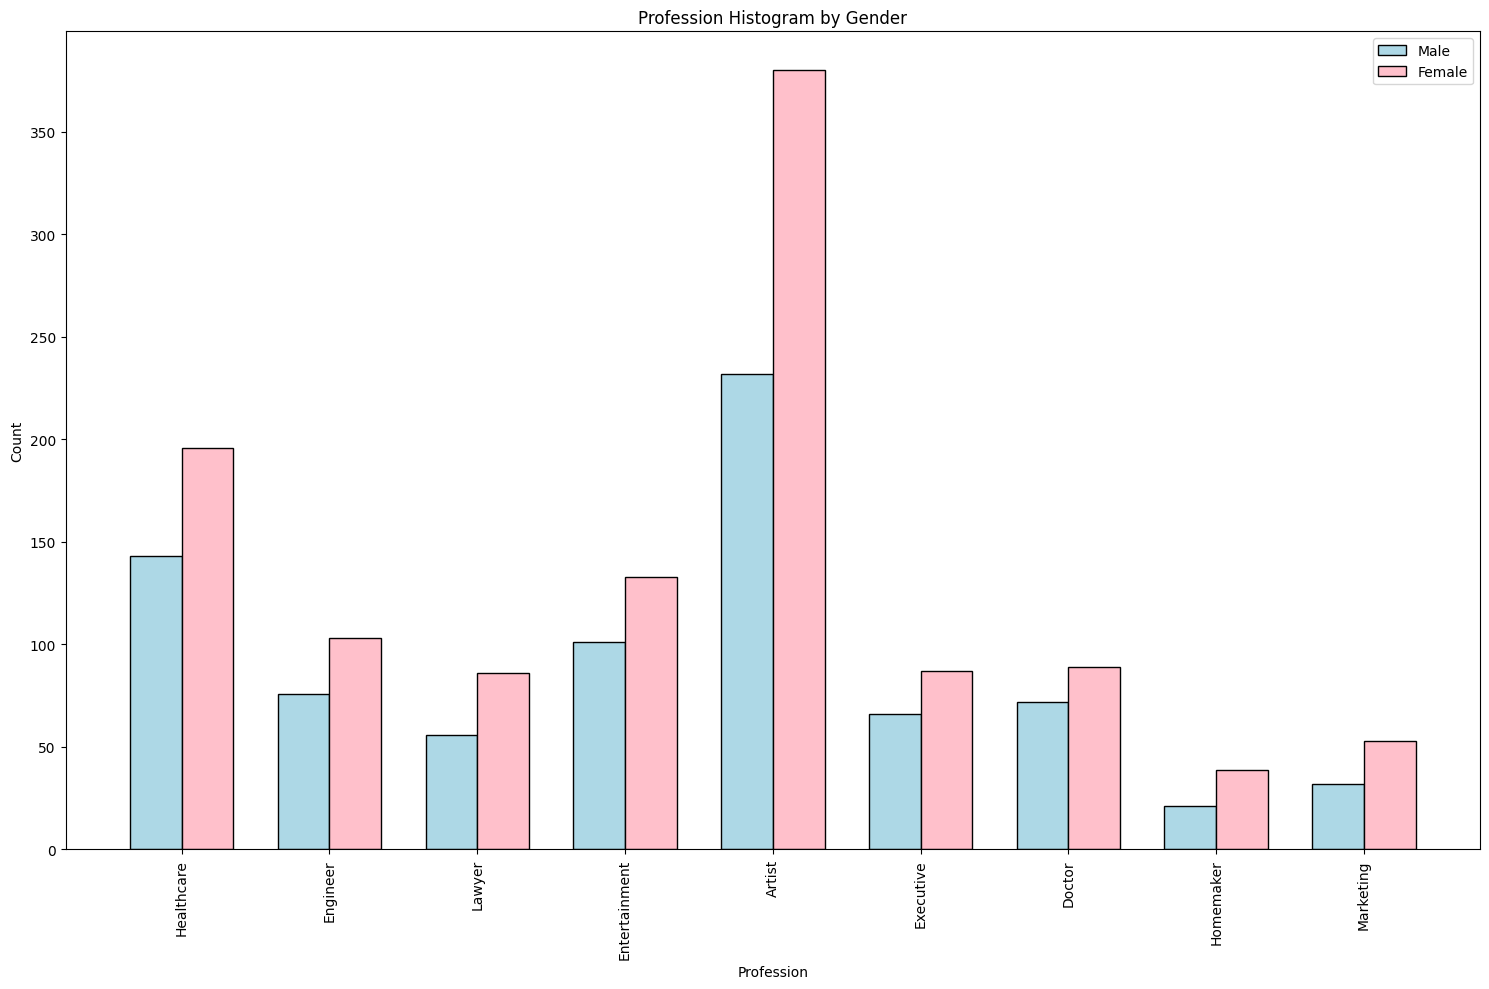

In [9]:
# drop nan values
customers.dropna(subset=['Profession'], inplace=True)

# worldcloud
wordcloud = WordCloud(width=1500, height=800, background_color='white', colormap='jet').generate(' '.join(customers['Profession'].astype(str)))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# pie chart
profession_counts = customers['Profession'].value_counts()

labels = [f'{label} ({count})' for label, count in profession_counts.items()]
explode = (0.05,) * len(profession_counts)

plt.figure(figsize=(15,10))
plt.pie(profession_counts, explode=explode, labels=labels, autopct='%1.1f%%', wedgeprops=dict(edgecolor='black'))
plt.title('Profession Distribution')
plt.show()

# divide each profession by gender
professions = customers['Profession'].unique()
male_counts = customers[customers['Gender'] == 'Male']['Profession'].value_counts()
female_counts = customers[customers['Gender'] == 'Female']['Profession'].value_counts()

bar_width = 0.35  # Width of the bars
index = np.arange(len(professions))  # Position of bars on x-axis
plt.figure(figsize=(15,10))
plt.bar(index - bar_width/2, [male_counts.get(prof, 0) for prof in professions], bar_width, edgecolor='black', label='Male', color='lightblue')
plt.bar(index + bar_width/2, [female_counts.get(prof, 0) for prof in professions], bar_width, edgecolor='black', label='Female', color='pink')

plt.xlabel('Profession')
plt.ylabel('Count')
plt.title('Profession Histogram by Gender')
plt.xticks(index, professions, rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

## Work Experience

Min Work Experience: 0 years
Max Work Experience: 17 years
Standard Deviation: 3.93


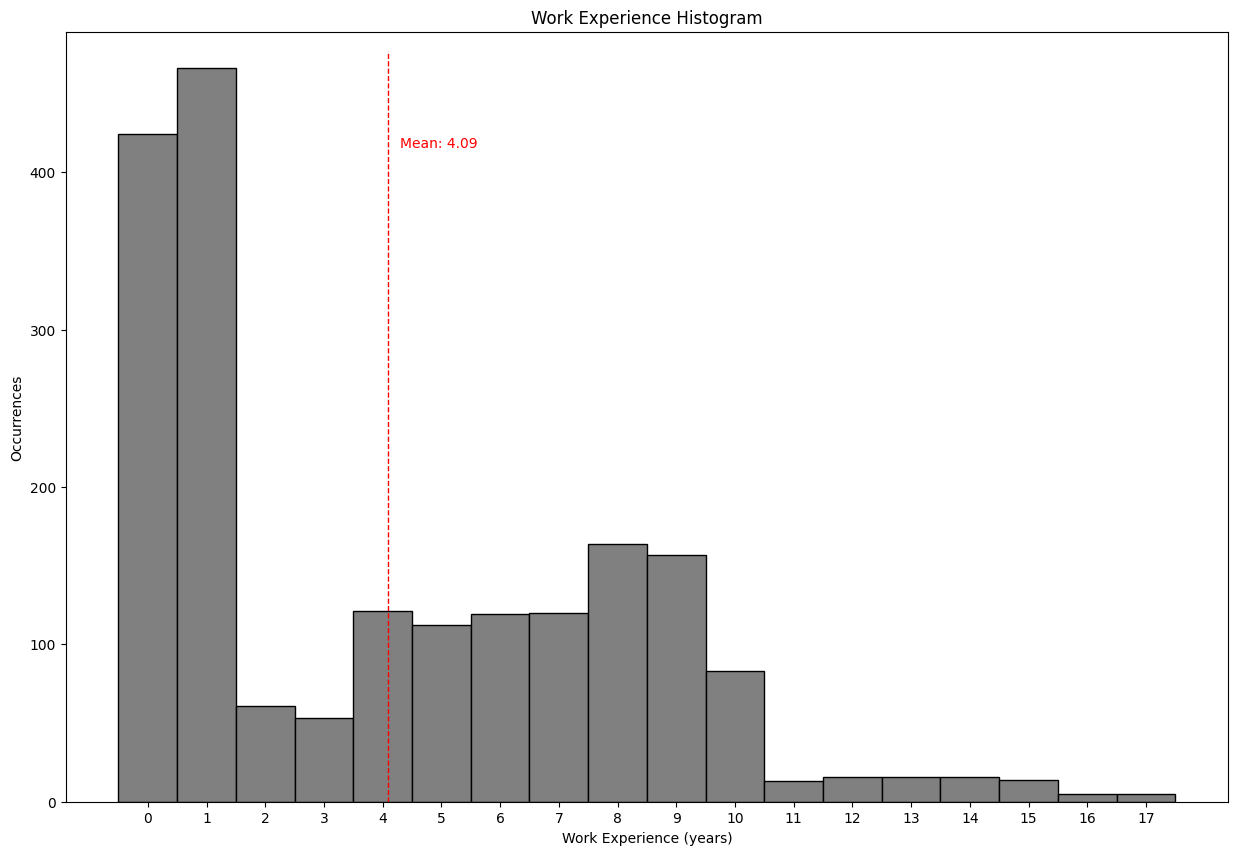

In [10]:
# get minimum and maximum working years
min_work_years = customers['Work Experience'].min()
max_work_years = customers['Work Experience'].max()

print('Min Work Experience: {:.0f} years'.format(min_work_years))
print('Max Work Experience: {:.0f} years'.format(max_work_years))

# calculate average working years
average_work_years = customers['Work Experience'].mean()

# calculate standard deviation
std_work_years = customers['Work Experience'].std()
print('Standard Deviation: {:.2f}'.format(std_work_years))

# histogram
plt.figure(figsize=(15,10))
plt.hist(customers['Work Experience'], bins=range(0, max_work_years + 2), color='gray', edgecolor='black', align='left')
plt.xticks(np.arange(min_work_years, max_work_years + 1, 1))
plt.axvline(average_work_years, color='red', linestyle='dashed', linewidth=1, ymax=0.975)
plt.text(average_work_years * 1.05, plt.ylim()[1] * 0.85, 'Mean: {:.2f}'.format(average_work_years), color='red')

plt.title('Work Experience Histogram')
plt.xlabel('Work Experience (years)')
plt.ylabel('Occurrences')
plt.show()

## Family Size

Min Family Size: 1
Max Family Size: 9
Standard Deviation: 1.97


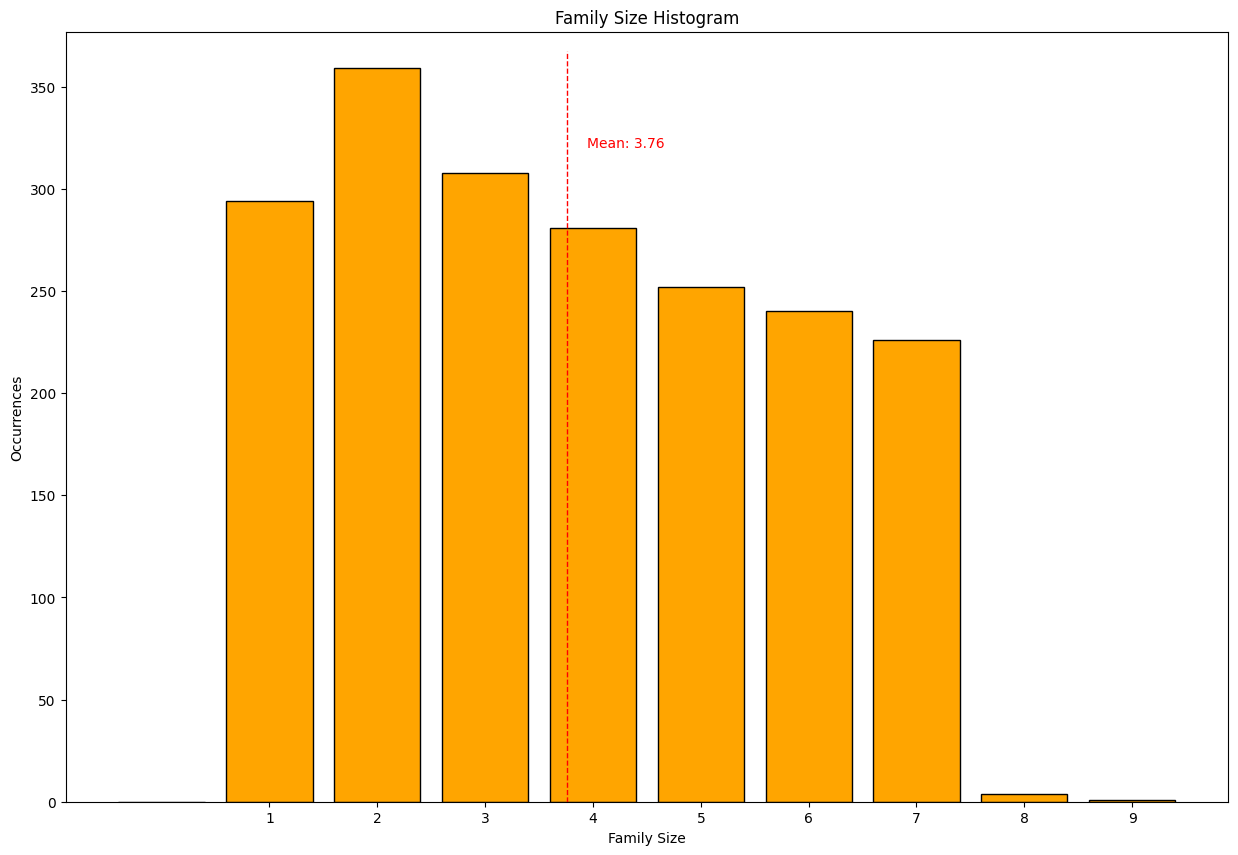

In [11]:
# get minimum and maximum family size
min_family_size = customers['Family Size'].min()
max_family_size = customers['Family Size'].max()

print('Min Family Size: {:.0f}'.format(min_family_size))
print('Max Family Size: {:.0f}'.format(max_family_size))

# calculate average family size
average_family_size = customers['Family Size'].mean()

# calculate standard deviation
std_family_size = customers['Family Size'].std()
print('Standard Deviation: {:.2f}'.format(std_family_size))

# histogram
plt.figure(figsize=(15,10))
plt.hist(customers['Family Size'], bins=range(0, max_family_size + 2), color='orange', edgecolor='black', align='left', rwidth=0.8)
plt.xticks(np.arange(min_family_size, max_family_size + 1, 1))
plt.axvline(average_family_size, color='red', linestyle='dashed', linewidth=1, ymax=0.975)
plt.text(average_family_size * 1.05, plt.ylim()[1] * 0.85, 'Mean: {:.2f}'.format(average_family_size), color='red')

plt.title('Family Size Histogram')
plt.xlabel('Family Size')
plt.ylabel('Occurrences')
plt.show()

# Data Cleaning

## Age

Since this is a dataset of customers, it's very weird to see extremely young people in it, especially 0 year olds.

In [12]:
customers.loc[customers['Age']==0].describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,23.0,1060.086957,586.930685,212.0,561.5,864.0,1594.0,1980.0
Age,23.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Annual Income ($),23.0,117714.521739,42685.736640,22000.0,99974.5,121926.0,143682.5,186002.0
Spending Score (1-100),23.0,57.260870,30.039697,7.0,26.5,63.0,83.5,96.0
Work Experience,23.0,4.130435,4.267257,0.0,1.0,2.0,7.5,15.0
Family Size,23.0,3.956522,2.163294,1.0,2.0,4.0,6.0,7.0


What's even weirder is that they have an income, and some even work experience. This anomaly is probably a data error, so we decided to remove these data entries. We'll only keep customers that have an age of 18+ years.

In [13]:
customers = customers[customers['Age']>=18]
customers.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1638 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              1638 non-null   int64 
 1   Gender                  1638 non-null   object
 2   Age                     1638 non-null   int64 
 3   Annual Income ($)       1638 non-null   int64 
 4   Spending Score (1-100)  1638 non-null   int64 
 5   Profession              1638 non-null   object
 6   Work Experience         1638 non-null   int64 
 7   Family Size             1638 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 115.2+ KB


## Work Experience

In the dataset there are customers with 0 work experience, so we assume that:

* People ranging from age 18 to 30 can have zero work experience since it's the average age of people looking for their first job.

* For people older than 30, we replace the zero experience with the median work experience of customers 5 years younger and older from same profession.

In [14]:
customers.loc[customers['Work Experience']==0].describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,368.0,912.480978,548.932831,4.0,464.25,923.0,1309.00,1901.0
Age,368.0,57.467391,24.108158,18.0,36.75,57.0,80.00,99.0
Annual Income ($),368.0,104683.894022,47670.672741,1000.0,67905.50,99966.5,144783.25,189945.0
Spending Score (1-100),368.0,49.964674,27.795700,0.0,26.00,51.0,75.00,100.0
Work Experience,368.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
Family Size,368.0,3.733696,1.958634,1.0,2.00,4.0,5.00,9.0


In [15]:
for index, row in customers.iterrows():
    if row['Age'] > 30 and row['Work Experience'] == 0:
        profession = row['Profession']
        age = row['Age']
        median_work_experience = customers[(customers['Profession'] == profession) & (customers['Age'] >= age - 5) & (customers['Age'] <= age + 5)]['Work Experience'].median()
        customers.at[index, 'Work Experience'] = median_work_experience

In [16]:
customers.loc[customers['Work Experience']==0].describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,64.0,811.078125,605.544024,4.0,193.75,779.5,1280.25,1876.0
Age,64.0,23.562500,3.975620,18.0,20.00,24.0,27.00,30.0
Annual Income ($),64.0,94820.750000,46898.094407,4000.0,59633.00,89908.0,126971.75,189369.0
Spending Score (1-100),64.0,50.250000,28.210659,1.0,28.00,52.0,73.50,99.0
Work Experience,64.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
Family Size,64.0,3.593750,1.857791,1.0,2.00,3.5,5.00,7.0


However, there are also 18 year olds with many years of work experience (some even 16!). 
Since we don't know the origin of the data, we decided to keep all the customers which started working at a minimum of 14 years old, which is an acceptable age for light work for most countries, and remove all the others. https://en.wikipedia.org/wiki/Legal_working_age

In [17]:
valid_customers = customers['Work Experience'] <= (customers['Age'] - 14)
customers = customers[valid_customers]

In [18]:
customers.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1596 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              1596 non-null   int64  
 1   Gender                  1596 non-null   object 
 2   Age                     1596 non-null   int64  
 3   Annual Income ($)       1596 non-null   int64  
 4   Spending Score (1-100)  1596 non-null   int64  
 5   Profession              1596 non-null   object 
 6   Work Experience         1596 non-null   float64
 7   Family Size             1596 non-null   int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 112.2+ KB


# Data Preprocessing

Converting categorical data like Gender and Profession into numerical values for easier processing.

In [19]:
customers_processed = customers.copy()

label_encoder = LabelEncoder()

customers_processed['Gender'] = label_encoder.fit_transform(customers_processed['Gender']) # male as 1 and female as 0
customers_processed['Profession'] = label_encoder.fit_transform(customers_processed['Profession'])

print(customers_processed.head())

   CustomerID  Gender  Age  Annual Income ($)  Spending Score (1-100)  \
0           1       1   19              15000                      39   
1           2       1   21              35000                      81   
2           3       0   20              86000                       6   
3           4       0   23              59000                      77   
4           5       0   31              38000                      40   

   Profession  Work Experience  Family Size  
0           5              1.0            4  
1           2              3.0            3  
2           2              1.0            1  
3           7              0.0            2  
4           3              2.0            6  


# Correlation Analysis

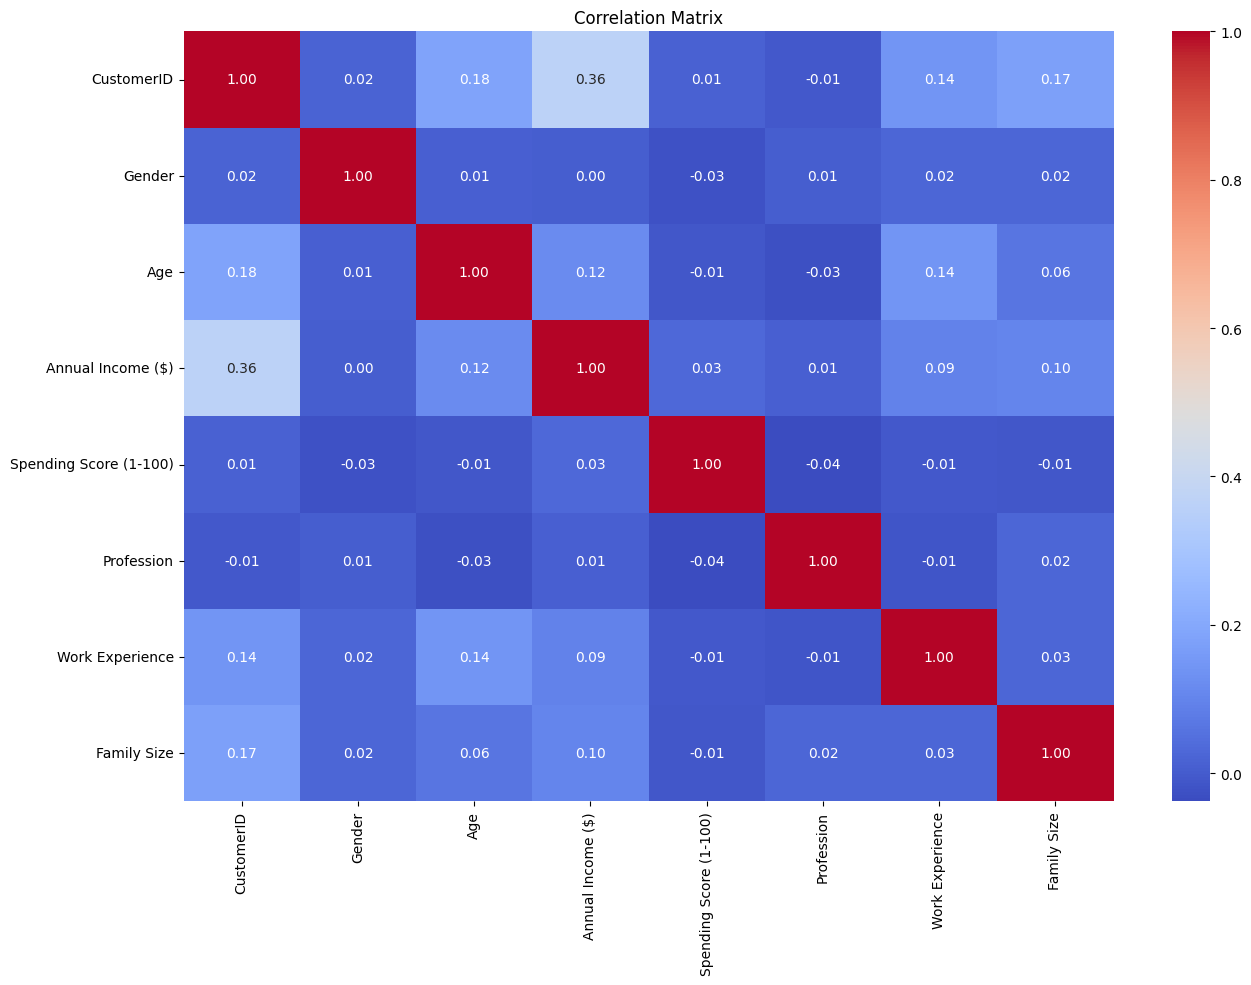

In [20]:
# correlation matrix of features
correlation_matrix = customers_processed.corr()

plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Clustering

## Elbow Method

/Users/simonetarenzi/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/simonetarenzi/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/simonetarenzi/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/simonetarenzi/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarni

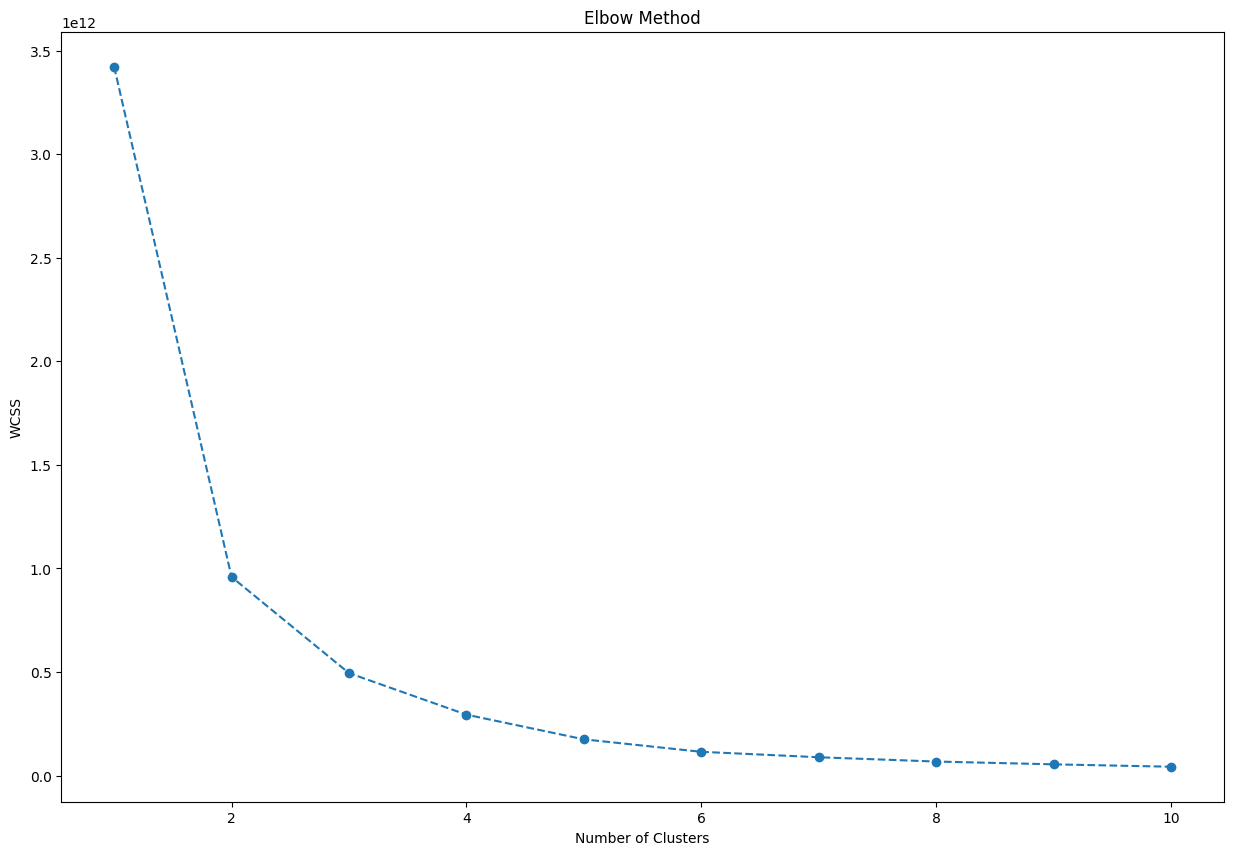

In [21]:
# elbow method for finding optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(customers_processed)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(15,10))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

## K-Means Clustering

/Users/simonetarenzi/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


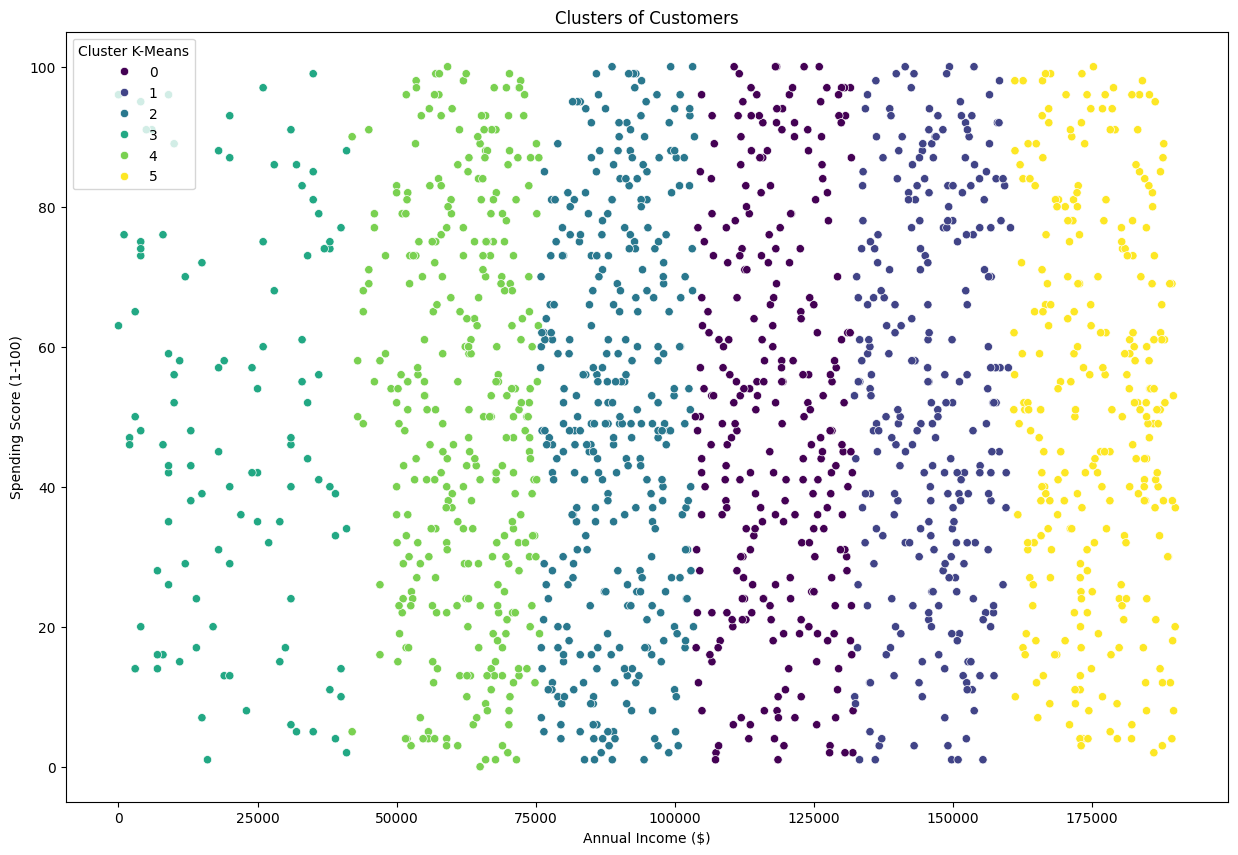

Silhouette Score: 0.57
Davies-Bouldin Score: 0.49
Calinski Harabasz Score: 9168.38


In [22]:
# k-means clustering
kmeans = KMeans(n_clusters=6)
customers_processed['Cluster K-Means'] = kmeans.fit_predict(customers_processed)

# plot clusters
plt.figure(figsize=(15,10))
sns.scatterplot(x='Annual Income ($)', y='Spending Score (1-100)', hue='Cluster K-Means', data=customers_processed, palette='viridis')
plt.title('Clusters of Customers')
plt.show()

# silhouette score
kmeans_silhouette_score = silhouette_score(customers_processed, customers_processed['Cluster K-Means'])

# davies bouldin score
kmeans_davies_bouldin_score = davies_bouldin_score(customers_processed, customers_processed['Cluster K-Means'])

# calinski harabasz score
kmeans_calinski_harabasz_score = calinski_harabasz_score(customers_processed, customers_processed['Cluster K-Means'])

print('Silhouette Score: {:.2f}'.format(kmeans_silhouette_score))
print('Davies-Bouldin Score: {:.2f}'.format(kmeans_davies_bouldin_score))
print('Calinski Harabasz Score: {:.2f}'.format(kmeans_calinski_harabasz_score))

## Hierarchical Agglomerative Clustering

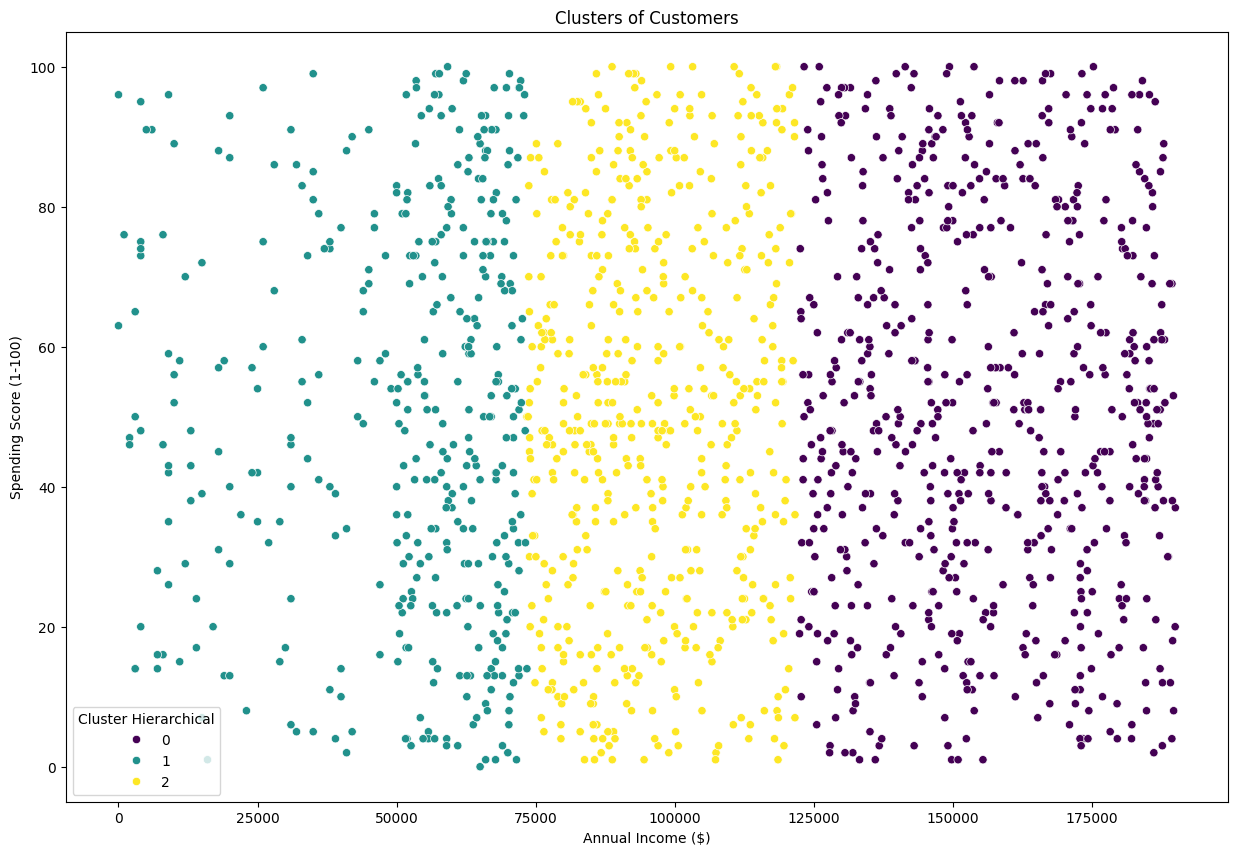

Silhouette Score: 0.55
Davies-Bouldin Score: 0.57
Calinski Harabasz Score: 4484.19


In [23]:
# hierarchical clustering
hierarchical = AgglomerativeClustering(n_clusters=3)
customers_processed['Cluster Hierarchical'] = hierarchical.fit_predict(customers_processed)

# plot clusters
plt.figure(figsize=(15,10))
sns.scatterplot(x='Annual Income ($)', y='Spending Score (1-100)', hue='Cluster Hierarchical', data=customers_processed, palette='viridis')
plt.title('Clusters of Customers')
plt.show()

# silhouette score
hierarchical_silhouette_score = silhouette_score(customers_processed, customers_processed['Cluster Hierarchical'])

# davies bouldin score
hierarchical_davies_bouldin_score = davies_bouldin_score(customers_processed, customers_processed['Cluster Hierarchical'])

# calinski harabasz score
hierarchical_calinski_harabasz_score = calinski_harabasz_score(customers_processed, customers_processed['Cluster Hierarchical'])

print('Silhouette Score: {:.2f}'.format(hierarchical_silhouette_score))
print('Davies-Bouldin Score: {:.2f}'.format(hierarchical_davies_bouldin_score))
print('Calinski Harabasz Score: {:.2f}'.format(hierarchical_calinski_harabasz_score))

## Gaussian Mixture Models

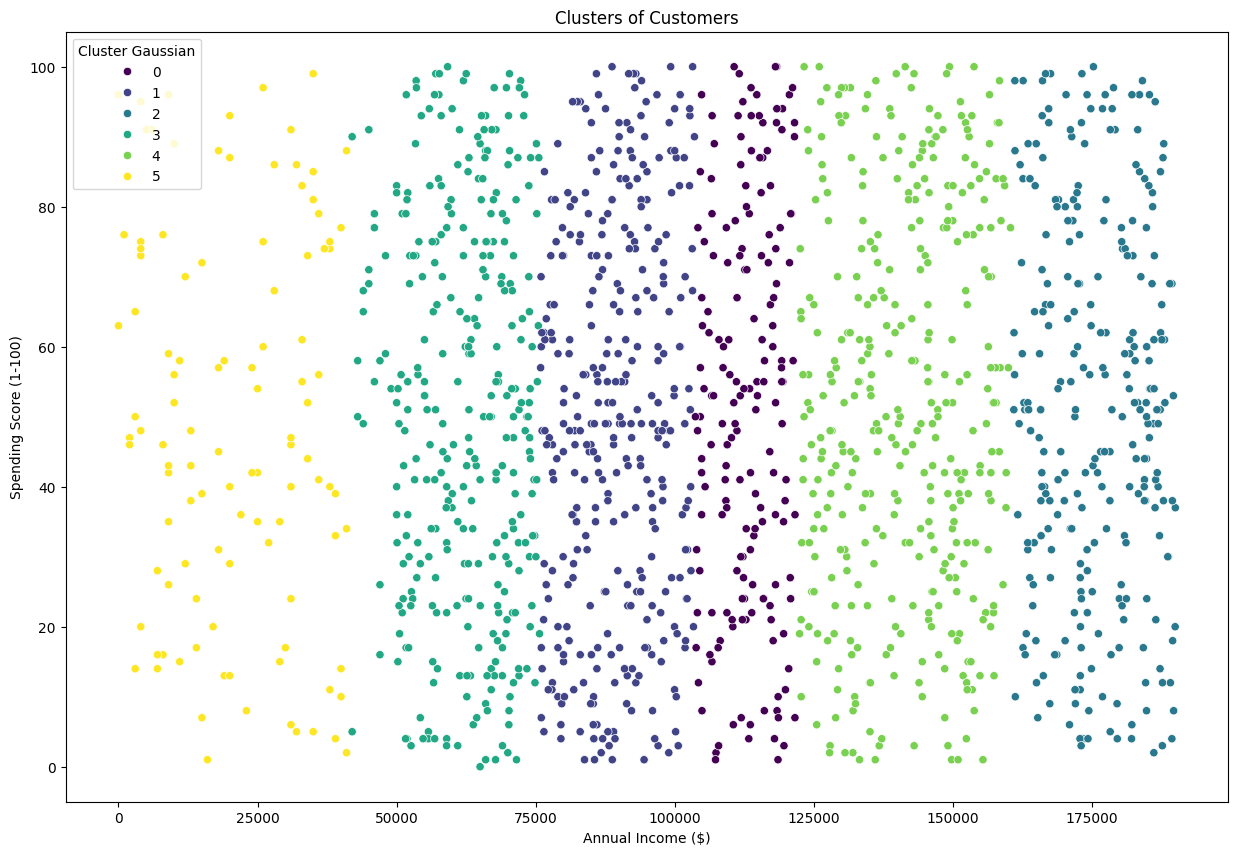

Silhouette Score: 0.54
Davies-Bouldin Score: 0.49
Calinski Harabasz Score: 8275.05


In [24]:
# gaussian mixture clustering
gaussian = GaussianMixture(n_components=6)
customers_processed['Cluster Gaussian'] = gaussian.fit_predict(customers_processed)

# plot clusters
plt.figure(figsize=(15,10))
sns.scatterplot(x='Annual Income ($)', y='Spending Score (1-100)', hue='Cluster Gaussian', data=customers_processed, palette='viridis')
plt.title('Clusters of Customers')
plt.show()

# silhouette score
gaussian_silhouette_score = silhouette_score(customers_processed, customers_processed['Cluster Gaussian'])

# davies bouldin score
gaussian_davies_bouldin_score = davies_bouldin_score(customers_processed, customers_processed['Cluster Gaussian'])

# calinski harabasz score
gaussian_calinski_harabasz_score = calinski_harabasz_score(customers_processed, customers_processed['Cluster Gaussian'])

print('Silhouette Score: {:.2f}'.format(gaussian_silhouette_score))
print('Davies-Bouldin Score: {:.2f}'.format(gaussian_davies_bouldin_score))
print('Calinski Harabasz Score: {:.2f}'.format(gaussian_calinski_harabasz_score))